<a href="https://colab.research.google.com/github/Devank-Garg/AIML-PROJECTS/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart failure prediction

#### Heart failure — sometimes known as congestive heart failure — occurs when the heart muscle doesn't pump blood as well as it should. When this happens, blood often backs up and fluid can build up in the lungs, causing shortness of breath.

#### One way to prevent heart failure is to prevent and control conditions that can cause it, such as coronary artery disease, high blood pressure, diabetes and obesity.

## MADE BY DEVANK GARG AND PANSHUL


In [ ]:
#Importing all the libraries that are being used in this code
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# importing dataset
data = pd.read_csv (r'/content/heart_failure_clinical_records_dataset.csv')


In [ ]:
data.head() # reading first 5 rows of dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# make columns lowercases for ease of use
data.columns = data.columns.str.lower()

# Understanding features:

- Anemia - anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. (there is not anemia - 0, there is anemia - 1)

- Creatine_phosphokinase (CPK) - CPK is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)

- Ejection_fraction (EF) - EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.

- Platelets - platelets are colorless blood cells that help blood clot. Platelets stop bleeding by clumping and forming plugs in blood vessel injuries. Thrombocytopenia might occur as a result of a bone marrow disorder such as leukemia or an immune system problem. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.

- Serum_creatinine - The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L). Here are the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.

- Serum_sodium - Measurement of serum sodium is routine in assessing electrolyte, acid-base, and water balance, as well as renal function. Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).

- Time - follow-up period (days)

- High_blood_pressure - (True - 1, False - 0)

- Age - between 40 - 95

- Diabetes - (True - 1, False - 0)

- Sex - (male - 1, female - 0)

- Smoking - (True - 1, False - 0)

- Death event - (True - 1, False - 0)

# EDA


In [ ]:
#Make a copy of the data for the visualisation:
df_vis = data.copy()
df_vis.death_event = df_vis.death_event.map({0:'Alive',1:'Dead'})
df_vis.diabetes = df_vis.diabetes.map({0:'No',1:'Yes'})
df_vis.smoking = df_vis.smoking.map({0:'No',1:'Yes'})
df_vis.sex = df_vis.sex.map({0:'Female',1:'Male'})


## Distribution of Death by heart failure in dataset:

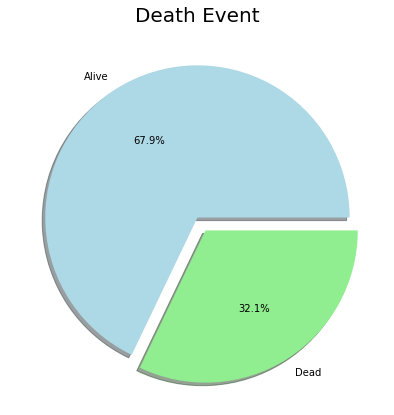

In [ ]:
# chart for death event by heart failure
plt.figure(figsize=(7,7))
plt.pie(data['death_event'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%',shadow=True,explode=[0,0.1], colors = ['lightblue','lightgreen'])
plt.title('Death Event',fontsize=20)
plt.show()

##### Data is unbalanced

## Sex distribution:

In [ ]:
#Sex distribution data
df_vis['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

##### As we can see males in the dataset are higher than females, and because of that a heart failure can not be measured by gender as the data is somehow biased towards males.

## Is there any relation between gender and death event?

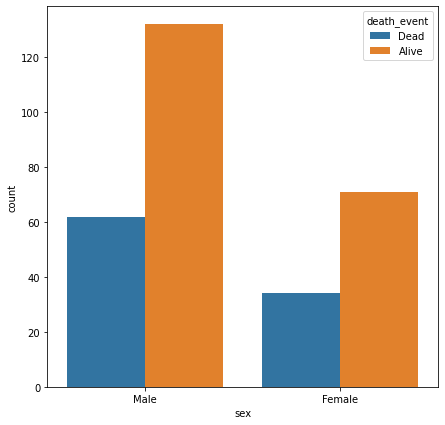

In [ ]:
# chart for Gender and  death event
plt.figure(figsize=(7,7))
sns.countplot(x='sex',hue='death_event',data=df_vis)

#### As we can see as males are more in the dataset, it's understandable that they are more likely to die from heart failure.

## Is there a relationship between age and heart failure?

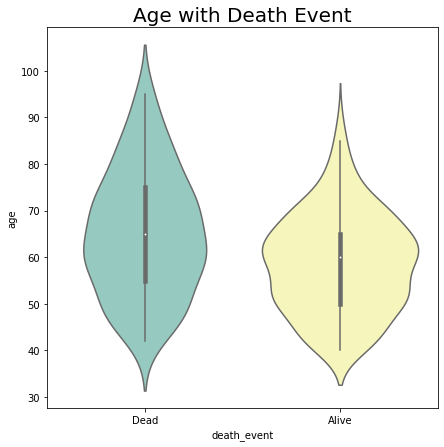

In [ ]:
# violin plots for Age with death event
plt.figure(figsize=(7,7))
sns.violinplot(x='death_event',y='age',data=df_vis, palette='Set3')
plt.title('Age with Death Event',fontsize=20)
plt.show()


#### As we can see, the older the person, the more likely he is to die from heart failure.

## Can diabetes be a cause of heart failure?

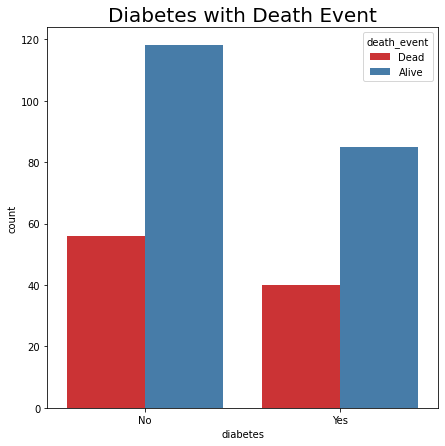

In [ ]:
# chart for Diabetes vs death event
plt.figure(figsize=(7,7))
sns.countplot(x='diabetes',hue='death_event',data=df_vis, palette='Set1')
plt.title('Diabetes with Death Event',fontsize=20)
plt.show()


#### As we can see, there is no significant difference between the number of people with diabetes and without diabetes who died from heart failure.

## Can smoking be a cause of heart failure?

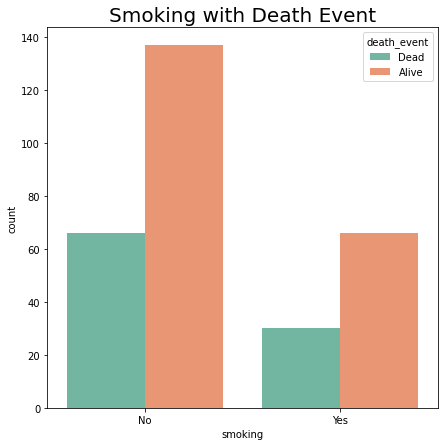

In [ ]:
# chart for smoking vs death event
plt.figure(figsize=(7,7))
sns.countplot(x='smoking',hue='death_event',data=df_vis, palette='Set2')
plt.title('Smoking with Death Event',fontsize=20)
plt.show()

#### As we can see, people who smoke are more likely to die from heart failure.


In [ ]:
#  chart for creatinine phosphokinase vs death event
import plotly.express as px
fig = px.violin(df_vis, y="creatinine_phosphokinase", x="death_event", color="death_event", box=True, points="all", hover_data=df_vis.columns)
fig.show()

# Data preprocessing


In [ ]:
data.isnull().sum()#Check for missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

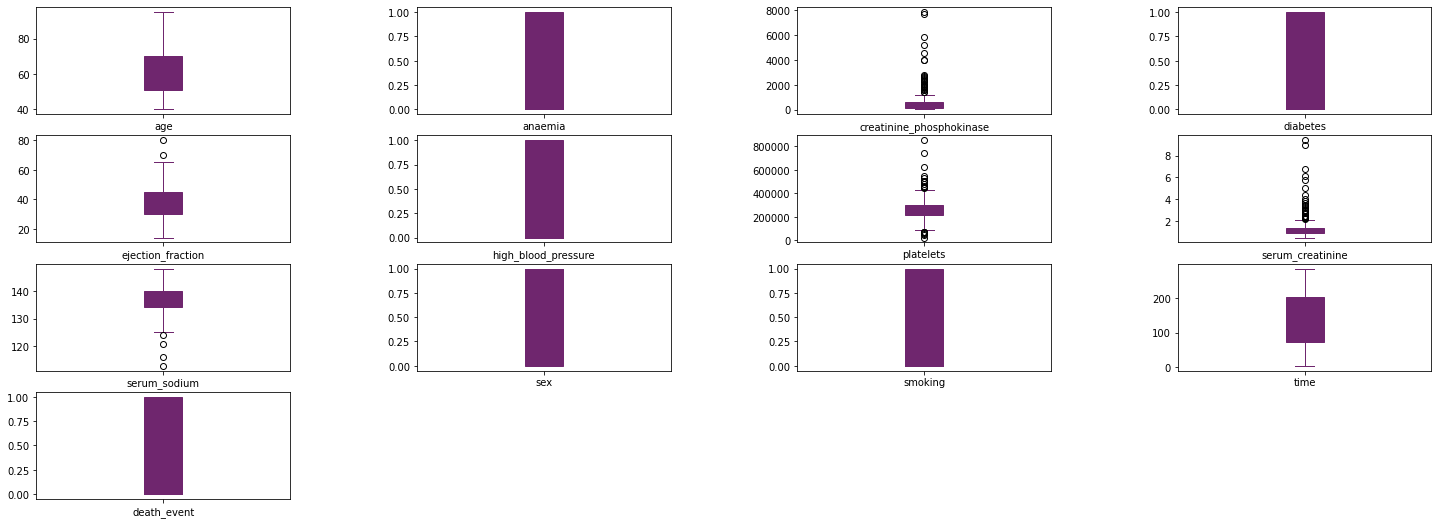

In [ ]:
# Check for outliers
nums = data.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

#### Outliers are present in the data

In [ ]:
# Deletion of outliers
data = data.drop(data[data['platelets']>420000].index)
data = data.drop(data[data['serum_creatinine']>2.5].index)
data = data.drop(data[data['creatinine_phosphokinase']>1500].index)

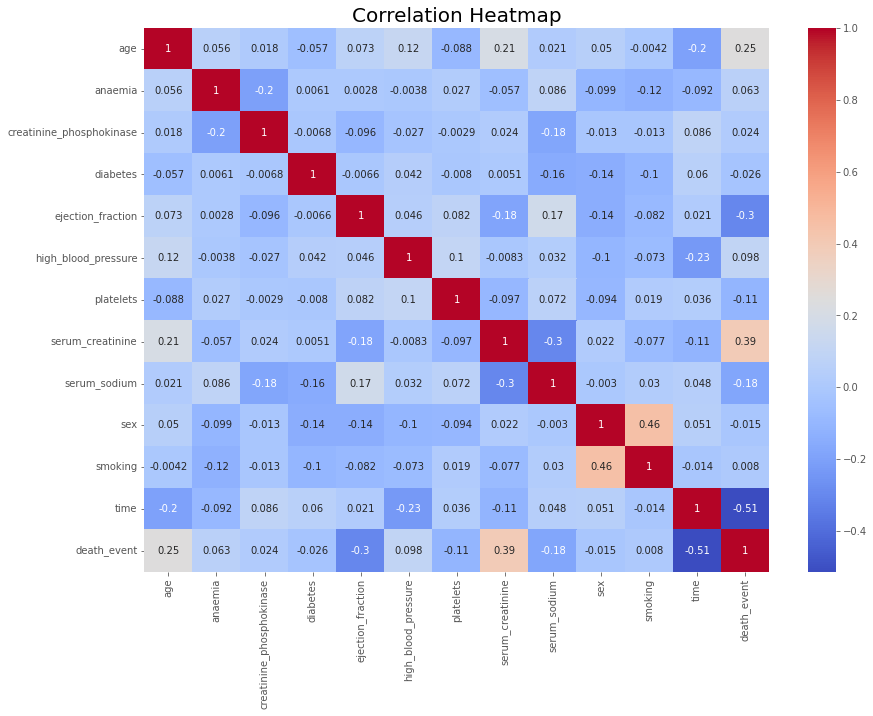

In [ ]:
## Correlation heatmap:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=20)
plt.show()


## Importance of features:

[0.09531315 0.02753872 0.0689343  0.02729427 0.13090494 0.02826694
 0.07334965 0.1340942  0.0743908  0.02484279 0.0294304  0.28563986]


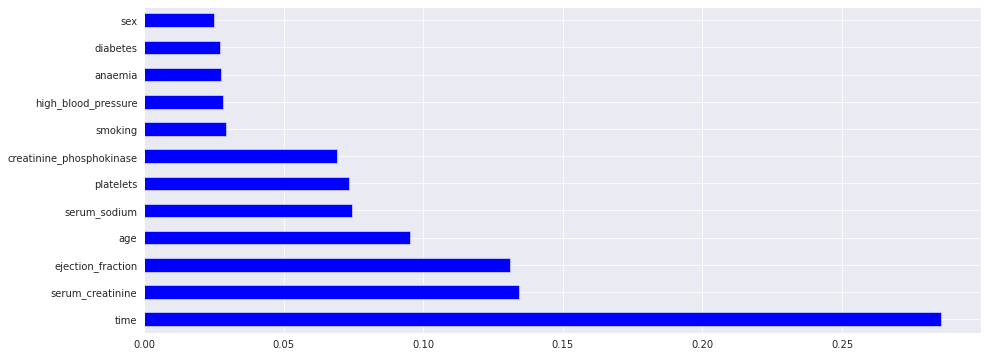

In [ ]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
x = data.iloc[:, :-1]
y = data.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh',color='blue')
plt.show()


## VIF

In [ ]:
# Check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

age                         32.133137
anaemia                      1.990220
creatinine_phosphokinase     2.494850
diabetes                     1.770123
ejection_fraction           13.574068
high_blood_pressure          1.751405
platelets                   14.339429
serum_creatinine            11.815396
serum_sodium                70.484089
sex                          3.668322
smoking                      1.905848
time                         5.988001
death_event                  2.594292
dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

age                         32.133137
anaemia                      1.990220
creatinine_phosphokinase     2.494850
diabetes                     1.770123
ejection_fraction           13.574068
high_blood_pressure          1.751405
platelets                   14.339429
serum_creatinine            11.815396
serum_sodium                70.484089
sex                          3.668322
smoking                      1.905848
time                         5.988001
death_event                  2.594292
dtype: float64

In [ ]:
# Treatment of multicolinearity:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>13:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [ ]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

serum_sodium has been removed
age has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,sex,smoking,time,death_event
0,0,582,0,20,1,265000.0,1.9,1,0,4,1
2,0,146,0,20,0,162000.0,1.3,1,1,7,1
3,1,111,0,20,0,210000.0,1.9,1,0,7,1
5,1,47,0,40,1,204000.0,2.1,1,1,8,1
6,1,246,0,15,0,127000.0,1.2,1,0,10,1


In [ ]:
# Calculating VIF for remaining columns:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(anaemia                      1.874963
 creatinine_phosphokinase     2.408144
 diabetes                     1.748202
 ejection_fraction            8.627403
 high_blood_pressure          1.703581
 platelets                   10.898727
 serum_creatinine             9.741133
 sex                          3.404279
 smoking                      1.893181
 time                         5.199160
 death_event                  2.377216
 dtype: float64, 11)

In [ ]:
# Splitting data:
X = vif_data.drop('death_event',axis=1)
y = vif_data['death_event']


In [ ]:
# Balance the data by oversampling the minority class

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)



In [ ]:
# Scaling data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)


In [ ]:
# Split into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
#Training Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.76


In [ ]:
# Training random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.93


In [ ]:
# Classification report and results
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.81      0.83      0.82        36

    accuracy                           0.81        67
   macro avg       0.81      0.80      0.80        67
weighted avg       0.81      0.81      0.81        67



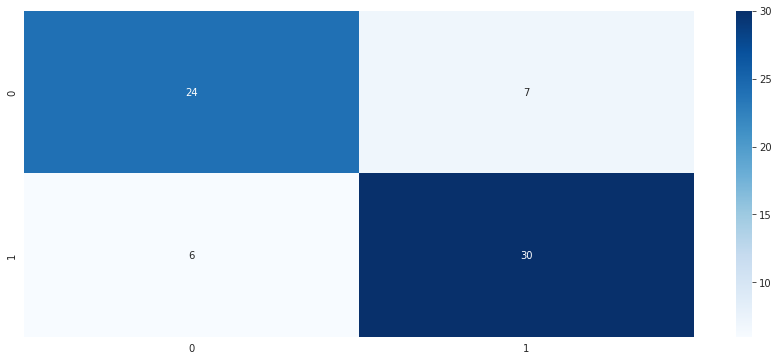

In [ ]:
# plot confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


